# Observable Trends
* It appears based on the plots that there is a strong relationship between temperature and distance from the equator.
* The Coefficients of Determination indicate that the model for the Northern hemisphere explains more of the variability of the temperatures around its mean than does the model for the Southern hemisphere. 
* The plots displaying the relationships between humidity and latitude, cloudiness and latitude, and wind speed and latitude appear to show a be weaker relationship than that of termparature and latitude.

In [25]:
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
#import time as tm
import random
from config import api_key
from citipy import citipy

In [26]:
# create empty list of cities to add random city list to
randomcitylist = []
randomcityset = set(randomcitylist)
number_unique_values = len(randomcityset) #starts at 0
# i = 1

while number_unique_values <= 700:
    randlat = random.randint(-90, 90)
    randlon = random.randint(-180, 180)
    city = citipy.nearest_city(randlat, randlon)
    if city in randomcityset:
        break
    elif city not in randomcityset:
        randomcityset.add(city.city_name)
        # randomcityset = set(randomcitylist)
        number_unique_values = len(randomcityset)

In [27]:
# Save config information.
endpoint = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{endpoint}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
lats = []
longs = []
temps = []
ids = []
cities = []
countries = []
humidities = []
cloudinesses = []
wind_speeds =[]
response_json = [] # Create an empty list to store the responses
lencitieslist = 0
pullcounter = 0

import time as tm

# Loop through the list of cities and perform a request for data on each
for city in randomcityset:
    
    if lencitieslist == 500:
        print(f"The cities list is now {lencitieslist} cities long and we have enough cities to proceed.")
        break
    
    elif lencitieslist < 500: 
        
        if pullcounter <= 50:
            
            pullcounter = pullcounter + 1
            
            response = requests.get(query_url + city).json()
            # print(f"Processing {city} now") 
    
            try:
                temps.append(response['main']['temp'])
                ids.append(response['id'])
                cities.append(response['name'])
                countries.append(response['sys']['country']) # country = response['sys']['country']
                humidities.append(response['main']['humidity'])
                cloudinesses.append(response['clouds']['all'])
                wind_speeds.append(response['wind']['speed'])
                lats.append(response['coord']['lat'])
                longs.append(response['coord']['lon'])
                lencitieslist = len(lats)
                # print(f"{city} has been successfully processed!")
                print(f"City number {response['id']}, {response['name']}, {response['sys']['country']} has been processed!") # remove if there are no differences
            #lencitieslist = lencitieslist + 1
            except KeyError: 
                print(f"Openweather did not find citipi city {city}, so skipping.")
                # print(f"Oops, coord for {response['name']} don't exist") # remove if there are no differences
            
        elif pullcounter >= 50:
            print(f"The cities list is now {lencitieslist} cities long! Pausing 60 seconds to get more cities...")
            tm.sleep(60)
            pullcounter = 0
        # print(f"The latitude information received is: {lats}")
# print(f"The temperature information received is: {temps} degrees farhenheit")
# print(f"The city name received is: {cities}")
# print(f"The humidity received is about: {humidities}%")
# print(f"The wind speed  received is: {wind_speeds}")
# print(f"The cities list is now {lencitieslist} cities long!")

City number 2155415, New Norfolk, AU has been processed!
Openweather did not find citipi city katsiveli, so skipping.
City number 2400547, Gamba, GA has been processed!
City number 1501377, Kungurtug, RU has been processed!
City number 1794794, Shouguang, CN has been processed!
City number 2656258, Barrhead, GB has been processed!
Openweather did not find citipi city shaartuz, so skipping.
City number 1634614, Nabire, ID has been processed!
City number 5972762, Hay River, CA has been processed!
Openweather did not find citipi city bolungarvik, so skipping.
City number 3474574, Palmas, BR has been processed!
City number 3899539, Antofagasta, CL has been processed!
City number 3386931, Tamandaré, BR has been processed!
City number 1106677, Bambous Virieux, MU has been processed!
City number 1852357, Shimoda, JP has been processed!
Openweather did not find citipi city tawkar, so skipping.
City number 2015852, Svetlaya, RU has been processed!
City number 2174444, Bowen, AU has been process

In [32]:
# cities.sort()
# name = response['name']
# lat = response['coord']['lat']
# temp = response['main']['temp']
# humidity = response['main']['humidity']
# wind_speed = response['wind']['speed']

In [33]:
weather_dict = {
    "id": ids,
    "city": cities,
    "country": countries,
    "lat": lats,
    "long": longs,    
    "temp": temps,
    "humidity": humidities,
    "cloudiness": cloudinesses,
    "windspeed": wind_speeds
}

In [34]:
weather_df = pd.DataFrame(weather_dict)
#print(weather_df.sort_values(by=['city']))

In [35]:
# additional dependencies for plotting
from scipy.stats import linregress
curr_date = tm.strftime('%Y-%m-%d', tm.localtime())

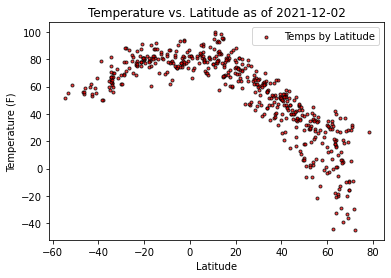

In [36]:
x_axis = weather_df['lat']
vals = weather_df['temp']
plt.scatter(x_axis, vals, marker=".", facecolors="red", edgecolors="black",
            alpha=0.75, label="Temps by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Temperature vs. Latitude as of {curr_date}")
plt.legend(loc="best")
plt.savefig("outputs/TempVsLat.png")
plt.show();

* To create the above plot, I collected weather data for a set of 500 distinct cities that are nearest to a corresponding set of randomly generated coordinates. The code to generate this plot looks at the temperature for each of the cities as the latitude approaches the equator.  

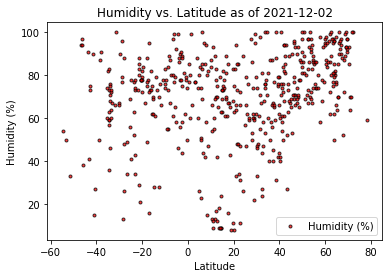

In [37]:
x_axis = weather_df['lat']
vals = weather_df['humidity']
# curr_date = tm.strftime('%Y-%m-%d', tm.localtime())
plt.scatter(x_axis, vals, marker=".", facecolors="red", edgecolors="black",
            alpha=0.75, label="Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Humidity vs. Latitude as of {curr_date}")
plt.legend(loc="best")
plt.savefig("outputs/HumidityVsLat.png")
plt.show();

* To create the above plot, I collected weather data for a set of 500 distinct cities that are nearest to a corresponding set of randomly generated coordinates. The code to generate this plot looks at the humidity for each of the cities as the latitude approaches the equator.

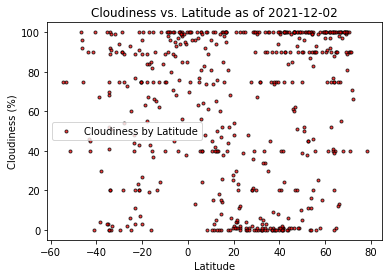

In [38]:
x_axis = weather_df['lat']
vals = weather_df['cloudiness']
# curr_date = tm.strftime('%Y-%m-%d', tm.localtime())
plt.scatter(x_axis, vals, marker=".", facecolors="red", edgecolors="black",
            alpha=0.75, label="Cloudiness by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Cloudiness vs. Latitude as of {curr_date}")
plt.legend(loc="best")
plt.savefig("outputs/CloudinessVsLat.png")
plt.show();

* To create the above plot, I collected weather data for a set of 500 distinct cities that are nearest to a corresponding set of randomly generated coordinates. The code to generate this plot looks at the cloudiness for each of the cities as the latitude approaches the equator.

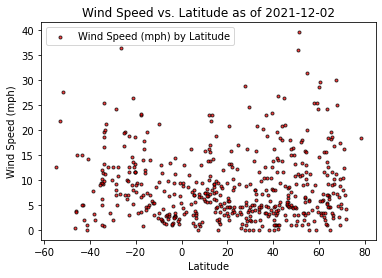

In [39]:
x_axis = weather_df['lat']
vals = weather_df['windspeed']
# curr_date = tm.strftime('%Y-%m-%d', tm.localtime())
plt.scatter(x_axis, vals, marker=".", facecolors="red", edgecolors="black",
            alpha=0.75, label="Wind Speed (mph) by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed vs. Latitude as of {curr_date}")
plt.legend(loc="best")
plt.savefig("outputs/WindspeedVsLat.png")
plt.show();

* To create the above plot, I collected weather data for a set of 500 distinct cities that are nearest to a corresponding set of randomly generated coordinates. The code to generate this plot looks at the wind speed for each of the cities as the latitude approaches the equator.

In [40]:
# create dataframes for Northern and Sourthern hemipsheres
northern_df = weather_df.loc[weather_df["lat"] > 0]
# print(northern_df.sort_values(by=['city']))
southern_df = weather_df.loc[weather_df["lat"] <= 0]
# print(southern_df.sort_values(by=['city']))

The r-squared is: 0.7746892948198264


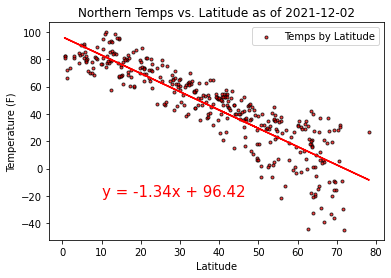

In [41]:
x_axis = northern_df['lat']
vals = northern_df['temp']
# curr_date = tm.strftime('%Y-%m-%d', tm.localtime())
# Add the linear regression equation and line to plot
# from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, vals)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_axis, vals)
plt.scatter(x_axis, vals, marker=".", facecolors="red", edgecolors="black",
            alpha=0.75, label="Temps by Latitude")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Northern Temps vs. Latitude as of {curr_date}")
plt.legend(loc="best")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("outputs/NorthernTempVsLat.png")
plt.show();

The r-squared is: 0.47594413363073784


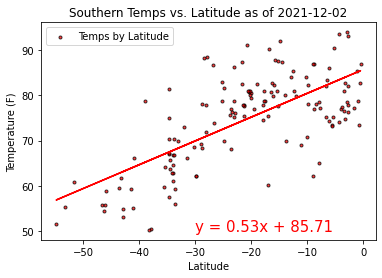

In [42]:
x_axis = southern_df['lat']
vals = southern_df['temp']
# curr_date = tm.strftime('%Y-%m-%d', tm.localtime())
# Add the linear regression equation and line to plot
# from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, vals)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_axis, vals)
plt.scatter(x_axis, vals, marker=".", facecolors="red", edgecolors="black",
            alpha=0.75, label="Temps by Latitude")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Southern Temps vs. Latitude as of {curr_date}")
plt.legend(loc="best")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("outputs/SouthernTempVsLat.png")
plt.show();

* Based on a random sample set of data from 500 cities retrieved from the openweather api, there appears to be a strong relationship between temperature and latitude. As the latitude approaches the equator from the north and from the south, temperatures rise.  

The r-squared is: 0.18476268666622286


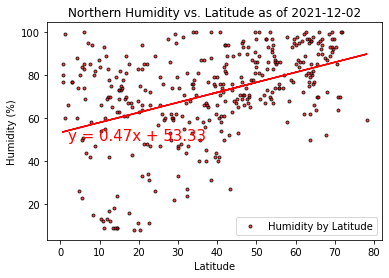

In [43]:
x_axis = northern_df['lat']
vals = northern_df['humidity']
# curr_date = tm.strftime('%Y-%m-%d', tm.localtime())
# Add the linear regression equation and line to plot
# from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, vals)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_axis, vals)
plt.scatter(x_axis, vals, marker=".", facecolors="red", edgecolors="black",
            alpha=0.75, label="Humidity by Latitude")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(2,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Humidity vs. Latitude as of {curr_date}")
plt.legend(loc="best")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("outputs/NorthernHumidityVsLat.png")
plt.show();

The r-squared is: 0.03793932614648741


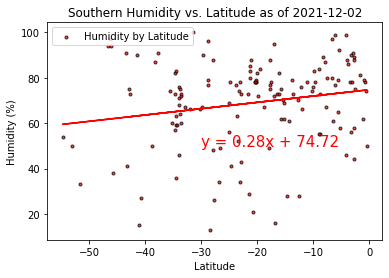

In [44]:
x_axis = southern_df['lat']
vals = southern_df['humidity']
# curr_date = tm.strftime('%Y-%m-%d', tm.localtime())
# Add the linear regression equation and line to plot
# from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, vals)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_axis, vals)
plt.scatter(x_axis, vals, marker=".", facecolors="red", edgecolors="black",
            alpha=0.75, label="Humidity by Latitude")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Humidity vs. Latitude as of {curr_date}")
plt.legend(loc="best")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("outputs/SouthernHumidityVsLat.png")
plt.show();

* Using the same set of data there appears to be a weaker relationship between humidity and distance from the equator, in both the northern and southern hemispheres. 

The r-squared is: 0.04642342297750081


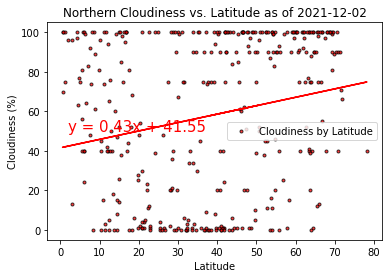

In [45]:
x_axis = northern_df['lat']
vals = northern_df['cloudiness']
# curr_date = tm.strftime('%Y-%m-%d', tm.localtime())
# Add the linear regression equation and line to plot
# from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, vals)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_axis, vals)
plt.scatter(x_axis, vals, marker=".", facecolors="red", edgecolors="black",
            alpha=0.75, label="Cloudiness by Latitude")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(2,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Cloudiness vs. Latitude as of {curr_date}")
plt.legend(loc="best")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("outputs/NorthernCloudinessVsLat.png")
plt.show();

The r-squared is: 0.08502924043216518


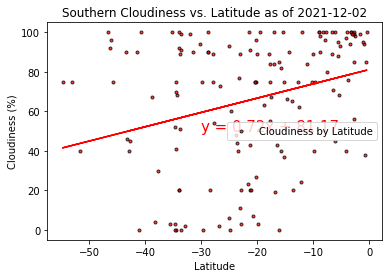

In [46]:
x_axis = southern_df['lat']
vals = southern_df['cloudiness']
# curr_date = tm.strftime('%Y-%m-%d', tm.localtime())
# Add the linear regression equation and line to plot
# from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, vals)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_axis, vals)
plt.scatter(x_axis, vals, marker=".", facecolors="red", edgecolors="black",
            alpha=0.75, label="Cloudiness by Latitude")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Cloudiness vs. Latitude as of {curr_date}")
plt.legend(loc="best")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("outputs/SouthernCloudinessVsLat.png")
plt.show();

* Using the same set of data there appears to be a weaker relationship between cloudiness and distance from the equator, in both the northern and southern hemispheres.

The r-squared is: 0.0193634597421283


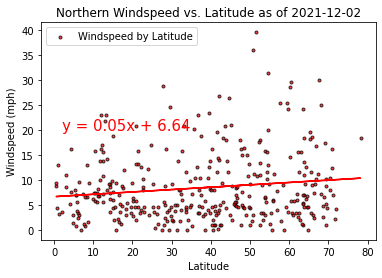

In [47]:
x_axis = northern_df['lat']
vals = northern_df['windspeed']
# curr_date = tm.strftime('%Y-%m-%d', tm.localtime())
# Add the linear regression equation and line to plot
# from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, vals)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_axis, vals)
plt.scatter(x_axis, vals, marker=".", facecolors="red", edgecolors="black",
            alpha=0.75, label="Windspeed by Latitude")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(2,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.title(f"Northern Windspeed vs. Latitude as of {curr_date}")
plt.legend(loc="best")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("outputs/NorthernWindspeedVsLat.png")
plt.show();

The r-squared is: 0.07959586923217957


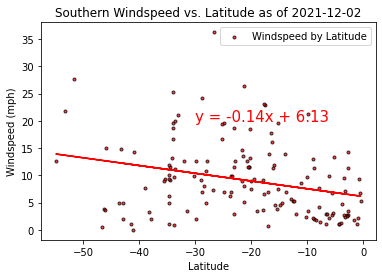

In [48]:
x_axis = southern_df['lat']
vals = southern_df['windspeed']
# curr_date = tm.strftime('%Y-%m-%d', tm.localtime())
# Add the linear regression equation and line to plot
# from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, vals)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_axis, vals)
plt.scatter(x_axis, vals, marker=".", facecolors="red", edgecolors="black",
            alpha=0.75, label="Windspeed by Latitude")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.title(f"Southern Windspeed vs. Latitude as of {curr_date}")
plt.legend(loc="best")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("outputs/SouthernWindspeedVsLat.png")
plt.show();

* Using the same set of data there appears to be minimal relationship between windspeed and distance from the equator, in both the northern and southern hemispheres. 

In [49]:
weather_df.to_csv("outputs/weather.csv",index = False) # Write to a CSV file